In [1]:
import numpy as np
import pandas as pd

In [2]:
import random
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv("Joke Pred/train_MaefO4x/train.csv")

In [4]:
train.head()

,id,user_id,joke_id,Rating
0,31030_110,31030,110,2.750
1,16144_109,16144,109,5.094
2,23098_6,23098,6,-6.438
3,14273_86,14273,86,4.406
4,18419_134,18419,134,9.375


In [5]:
#Create test and training set
ratings_training = train.sample(frac=0.75, random_state=99)
ratings_test = train.drop(ratings_training.index)

In [6]:
R_df = pd.pivot_table(ratings_training, index="user_id", columns="joke_id", values="Rating").fillna(0)
R_df.head()

joke_id,1,2,3,4,5,6,7,8,9,10,...,130,131,132,133,134,135,136,137,138,139
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.219,-9.281,0.000,-6.781,0.875,-9.656,0.000,-7.469,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-9.688,0.000,9.531,0.000,0.406,0.000,9.656,0.000,0.000,-9.125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000,0.000,-7.219,-2.031,0.000,0.000,0.000,-9.812,-9.781,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.906,0.000,-5.906,0.000,0.000,3.875,0.000,0.000,6.094,5.406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.656,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#de-mean the data (normalize by each users mean) and convert it from a dataframe to a numpy array.
R = R_df.as_matrix()
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

E:\AnacondaNew\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [8]:
#SVD
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k = 3)

In [9]:
sigma = np.diag(sigma)

In [10]:
#Predictions
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [11]:
pred_df=pd.DataFrame(all_user_predicted_ratings)
pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,-0.281386,-6.420559,-4.034308,-4.138271,-5.846635,-6.483405,-1.703676,-3.082942,-1.290175,-0.280504,...,-0.030150,-0.808829,0.662833,2.195096,0.817286,1.628723,-0.096264,1.071787,2.537658,1.359818
1,-0.299190,0.308884,2.001057,1.671099,1.236328,2.430338,4.105819,3.232319,4.311595,-0.278896,...,-0.360023,-0.638609,0.182472,0.835654,-0.041229,0.465658,-0.406458,0.086151,0.771335,0.237310
2,-0.375619,-1.274052,-2.612965,-1.838924,-2.313480,-4.911919,-5.086095,-4.091693,-5.040351,-0.398922,...,-0.260004,-0.407839,-0.519858,-0.269413,-0.104494,-0.276352,-0.293966,-0.158222,0.037907,-0.155569
3,0.715192,-1.247833,0.161949,-0.352732,-0.538506,0.769829,2.265843,1.252800,2.330408,0.726488,...,0.748053,0.637844,1.044764,1.258389,0.867035,1.156419,0.761965,0.967747,1.185371,1.032061
4,-0.253763,-0.618589,0.173328,-0.038846,-0.204034,0.420879,1.242171,0.761721,1.312537,-0.245802,...,-0.259755,-0.361799,-0.044826,0.181810,-0.144977,0.059698,-0.268416,-0.086328,0.149084,-0.030521


In [12]:
ratings_test.head()

,id,user_id,joke_id,Rating
7,1159_9,1159,9,-2.906
13,6966_76,6966,76,6.031
14,2538_83,2538,83,9.781
20,8445_46,8445,46,-1.906
21,36135_37,36135,37,3.469


In [13]:
pred_df1 = pred_df.stack().reset_index(name='pred_rating').rename(columns={'level_0':'user_id','level_1':'joke_id'})
pred_df1['user_id'] = pred_df1['user_id'] + 1
pred_df1['joke_id'] = pred_df1['joke_id'] + 1

In [14]:
pred_df1[(pred_df1['user_id']==3) & (pred_df1['joke_id']==1)]

,user_id,joke_id,pred_rating
278,3,1,-0.375619


In [15]:
pred_df1.head()

,user_id,joke_id,pred_rating
0,1,1,-0.281386
1,1,2,-6.420559
2,1,3,-4.034308
3,1,4,-4.138271
4,1,5,-5.846635


In [16]:
def clamp(n, minn=-10, maxn=10):
    return max(min(maxn, n), minn)

In [17]:
ratings_training=pd.merge(ratings_training,pred_df1,on=["user_id","joke_id"],how='inner')

ratings_training['pred_rating'] = [clamp(item) for item in ratings_training['pred_rating']]

np.sqrt(np.square(ratings_training['Rating'] - ratings_training['pred_rating']).mean())

4.4817493423061485

In [18]:
ratings_test=pd.merge(ratings_test,pred_df1,on=["user_id","joke_id"],how='inner')

ratings_test['pred_rating'] = [clamp(item) for item in ratings_test['pred_rating']]

np.sqrt(np.square(ratings_test['Rating'] - ratings_test['pred_rating']).mean())

4.788691811936165

E:\AnacondaNew\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


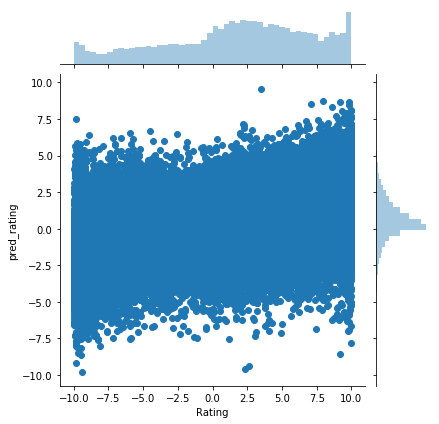

In [19]:
sns.jointplot(x='Rating',y='pred_rating',data=ratings_test)

In [25]:
ratings_test['Error'] = ratings_test['Rating'] - ratings_test['pred_rating']
ratings_test.head()

,id,user_id,joke_id,Rating,pred_rating,Error
0,1159_9,1159,9,-2.906,-0.020312,-2.885688
1,6966_76,6966,76,6.031,0.789853,5.241147
2,2538_83,2538,83,9.781,2.389608,7.391392
3,8445_46,8445,46,-1.906,-0.991329,-0.914671
4,36135_37,36135,37,3.469,1.120514,2.348486


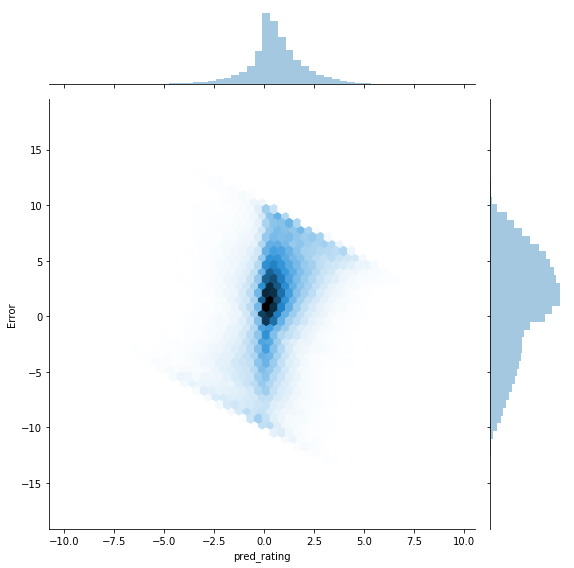

In [28]:
sns.jointplot(x='pred_rating', y='Error', data=ratings_test,kind='hex', height=8)

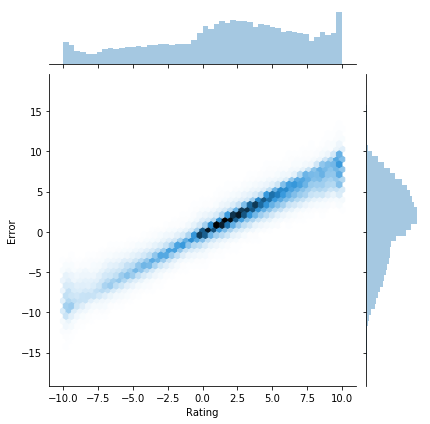

In [29]:
sns.jointplot(x='Rating', y='Error', data=ratings_test,kind='hex', height=6)

In [20]:
test = pd.read_csv("Joke Pred/test_MElQnvy/test.csv")

In [21]:
#Train on full data
R_df = pd.pivot_table(train, index="user_id", columns="joke_id", values="Rating").fillna(0)
R = R_df.as_matrix()
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)
U, sigma, Vt = svds(R_demeaned, k = 3)
sigma = np.diag(sigma)
#Predictions
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
pred_df=pd.DataFrame(all_user_predicted_ratings)
pred_df1 = pred_df.stack().reset_index(name='pred_rating').rename(columns={'level_0':'user_id','level_1':'joke_id'})
pred_df1['user_id'] = pred_df1['user_id'] + 1
pred_df1['joke_id'] = pred_df1['joke_id'] + 1

E:\AnacondaNew\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
test = pd.merge(test,pred_df1,on=["user_id","joke_id"],how='inner')

test['Rating'] = [clamp(item) for item in test['pred_rating']]

In [23]:
test.head()

,id,user_id,joke_id,pred_rating,Rating
0,6194_11,6194,11,0.713397,0.713397
1,19356_3,19356,3,0.369185,0.369185
2,23426_79,23426,79,3.184929,3.184929
3,40030_3,40030,3,-5.240404,-5.240404
4,19806_115,19806,115,3.318325,3.318325


In [30]:
test[["id","Rating"]].to_csv("Joke Pred/Sub2.csv", index=False)